# Thermodynamic Properties Calculation
Write a program to read the ‘therm.dat’ file for the calculation of thermodynamic 
properties of any given chemical species. The program must have the following 
capabilities.


1. Read a species list from a text input file (eg. CH4 H2O H2 CO CO2 O2 N2)
2. Create a module 
3. The module must have a Species (or any name that you wish) struct with the following variables
    1. Name
    2. Molecular weight
    3. Phase
    4. High_temperature_coeff (array size-7)
    5. Low_temperature_coeff (array size-7)
    
    
And the following functions
   1. A function for the calculation of molar specific heat of all species in the text 
input file (should accept T and array of species objects as argument)
   2. A method for the calculation of molar enthalpy of all species in the text input 
file (should accept T and array of species objects as argument)
   3. A method for the calculation of molar entropy of all species in the text input 
file (should accept T and array of species objects as argument)
   4. A function that calculates the enthalpy of the mixture (should accept T, 
species mole fractions, and species objects as argument)
   5. A function that calculates the molar specific heat of the mixture (should 
accept T, species mole fractions and species objects as argument)


# Reading data file

In [1]:
# Given Mol_wt_tuple

elementWeight = ( H = 1.00794e-3, He = 4.002602e-3, Li = 6.941e-3, Be = 9.012182e-3, B = 1.811e-3, C = 12.011e-3, N = 14.00674e-3, O = 15.9994e-3, F = 18.9984032e-3, Ne = 20.1797e-3,
Na = 22.98977e-3, Mg = 24.3050e-3, Al = 26.98154e-3, Si = 28.0855e-3, P = 30.97376e-3,
S = 32.066e-3, Cl = 35.4527e-3, Ar = 39.948e-3, K = 39.0983e-3, Ca = 40.078e-3,
Sc = 44.95591e-3, Ti = 47.88e-3, V = 50.9415e-3, Cr = 51.9961e-3, Mn = 54.9381e-3,
Fe = 55.847e-3, Co = 58.9332e-3, Ni = 58.69e-3, Cu = 63.546e-3, Zn = 65.39e-3,
Ga = 69.723e-3, Ge = 72.61e-3, As = 74.92159e-3, Se = 78.96e-3, Br = 79.904e-3,
Kr = 83.80e-3, Rb = 85.4678e-3, Sr = 87.62e-3, Y = 88.90585e-3, Zr = 91.224e-3,
Nb = 92.90638e-3, Mo = 95.94e-3, Tc = 97.9072e-3, Ru = 101.07e-3, Rh = 102.9055e-3,
Pd = 106.42e-3, Ag = 107.8682e-3, Cd = 112.411e-3, In = 114.82e-3, Sn = 118.710e-3,
Sb = 121.75e-3, Te = 127.6e-3, I = 126.90447e-3, Xe = 131.29e-3, Cs = 132.90543e-3,
Ba = 137.327e-3, La = 138.9055e-3, Ce = 140.115e-3, Pr = 140.90765e-3, Nd = 144.24e-3,
Pm = 144.9127e-3, Sm = 150.36e-3, Eu = 151.965e-3, Gd = 157.25e-3, Tb = 158.92534e-3,
Dy = 162.50e-3, Ho = 164.93032e-3, Er = 167.26e-3, Tm = 168.93421e-3, Yb = 173.04e-3,
Lu = 174.967e-3, Hf = 178.49e-3, Ta = 180.9479e-3, W = 183.85e-3, Re = 186.207e-3,
Pt = 195.08e-3, Au = 196.96654e-3, Hg = 200.59e-3, Tl = 204.3833e-3, Pb = 207.2e-3,
Bi = 208.98037e-3, Po = 208.9824e-3, At = 209.9871e-3, Rn = 222.0176e-3,
Fr = 223.0197e-3, Ra = 226.0254e-3, Ac = 227.0279e-3, Th = 232.0381e-3,
Pa = 231.03588e-3, U = 238.0508e-3, Np = 237.0482e-3, Pu = 244.0482e-3);

In [2]:
# Using the Molwt_cal function (taken from the 1st assignment) 
function Molwt_cal(Molwt_tuple,dict)
    dict_new= Dict()
    mol_wt = 0
    for key in keys(dict)
        for ele in keys(dict[key])
            mol_wt +=dict[key][ele]*Molwt_tuple[Symbol(ele)]
#             try
#                 mol_wt +=dict[key][ele]*Molwt_tuple[Symbol(ele)]
#             catch e
#                 typeof(e)  
#             end
        end
        dict_new[key] = mol_wt
        mol_wt=0
    end
    return dict_new
end

Molwt_cal (generic function with 1 method)

In [3]:
# Elements count dict (Purpose: Counts the number of elements in each species)

function Elem_count(file_name)
    f1 = open(file_name)
    data=readlines(f1)

    d_out=Dict()
    d_in = Dict()
    for i in range(2, stop=length(data)-1, step=4)
        for j in 1:div(length(strip(data[i][25:44])),5)
            try
                d_in[titlecase(strip(strip(data[i][25:44])[5*j-4:5*j-1]))] = parse(Int64, strip(data[i][25:44])[5*j])  # AP 1,6,11,..  an =5*n-4
            catch e
                typeof(e)
    #             showerror(stdout,e)
            end        
        end
        d_out[strip(data[i][1:15])] = d_in
        d_in= Dict()
    end
    return d_out
end


Elem_count (generic function with 1 method)

In [4]:
# Including the Molecular module
include("Molecular.jl")

# Returns a species array (containing their respective properties) from a text input file
function spec_in_file(file_name)

    # Reading file
    f1 = open(file_name)
    data=readlines(f1)
    
    arr= []
    for i = range(2, stop=length(data)-1, step=4)
    
    #   Higher temperature range coeff's
        a1_h = parse(Float64, strip(data[i+1][1:15]))
        a2_h = parse(Float64, strip(data[i+1][16:30]))
        a3_h = parse(Float64, strip(data[i+1][31:45]))
        a4_h = parse(Float64, strip(data[i+1][46:60]))
        a5_h = parse(Float64, strip(data[i+1][61:75]))
        a6_h = parse(Float64, strip(data[i+2][1:15]))
        a7_h = parse(Float64, strip(data[i+2][16:30]))

    #   Lower temperature range coeff's
        a1_l = parse(Float64, strip(data[i+2][31:45]))
        a2_l = parse(Float64, strip(data[i+2][46:60]))
        a3_l = parse(Float64, strip(data[i+2][61:75]))
        a4_l = parse(Float64, strip(data[i+3][1:15]))
        a5_l = parse(Float64, strip(data[i+3][16:30]))
        a6_l = parse(Float64, strip(data[i+3][31:45]))
        a7_l = parse(Float64, strip(data[i+3][46:60]))

#       Initializing the species
        ele = Molecular.Species()
        
#       Providing corresponding values to the elements
        ele.Name=String(strip(data[i][1:18]))
        ele.Molecular_weight = Molwt_cal(elementWeight,Elem_count(file_name))[ele.Name]
        ele.Phase = data[i][45]
        ele.High_temperature_coeff = [a1_h, a2_h, a3_h, a4_h, a5_h, a6_h, a7_h]
        ele.Low_temperature_coeff = [a1_l, a2_l, a3_l, a4_l, a5_l, a6_l, a7_l]
        ele.Common_Temp = parse(Float64,strip(data[i][66:73]))
        push!(arr,ele)
    end
    return arr
end

spec_in_file (generic function with 1 method)

In [5]:
arr = spec_in_file("therm.dat");

In [6]:
arr

79-element Vector{Any}:
 Main.Molecular.Species("O", 0.0159994, 'G', [2.56942078, -8.59741137e-5, 4.19484589e-8, -1.00177799e-11, 1.22833691e-15, 29217.5791, 4.78433864], [3.1682671, -0.00327931884, 6.64306396e-6, -6.12806624e-9, 2.11265971e-12, 29122.2592, 2.05193346], 1000.0)
 Main.Molecular.Species("O2", 0.0319988, 'G', [3.28253784, 0.00148308754, -7.57966669e-7, 2.09470555e-10, -2.16717794e-14, -1088.45772, 5.45323129], [3.78245636, -0.00299673416, 9.84730201e-6, -9.68129509e-9, 3.24372837e-12, -1063.94356, 3.65767573], 1000.0)
 Main.Molecular.Species("H", 0.00100794, 'G', [2.50000001, -2.30842973e-11, 1.61561948e-14, -4.73515235e-18, 4.98197357e-22, 25473.6599, -0.446682914], [2.5, 7.05332819e-13, -1.99591964e-15, 2.30081632e-18, -9.27732332e-22, 25473.6599, -0.446682853], 1000.0)
 Main.Molecular.Species("H2", 0.00201588, 'G', [3.3372792, -4.94024731e-5, 4.99456778e-7, -1.79566394e-10, 2.00255376e-14, -950.158922, -3.20502331], [2.34433112, 0.00798052075, -1.9478151e-5, 2.01572094

In [9]:
arr[1]

Main.Molecular.Species("O", 0.0159994, 'G', [2.56942078, -8.59741137e-5, 4.19484589e-8, -1.00177799e-11, 1.22833691e-15, 29217.5791, 4.78433864], [3.1682671, -0.00327931884, 6.64306396e-6, -6.12806624e-9, 2.11265971e-12, 29122.2592, 2.05193346], 1000.0)

## Testing the module functions

In [8]:
include("Molecular.jl")

Main.Molecular

In [9]:
Molecular.mol_sp_heat(298,spec_in_file("therm.dat"))

Dict{Any, Any} with 79 entries:
  "H(ni)"   => 54.958
  "C(ni)"   => 54.958
  "C"       => 20.8375
  "NH"      => 29.1912
  "NH3"     => 35.6458
  "C(pt)"   => 54.958
  "CO2(pt)" => 54.958
  "HOCN"    => 46.2804
  "NCO"     => 40.0957
  "CH2"     => 35.0102
  "NO"      => 29.8605
  "CH2OH"   => 48.3575
  "O(ni)"   => 54.958
  "CO2"     => 37.1264
  "C2H"     => 41.9929
  "(pt)"    => 54.958
  "CH4"     => 35.6834
  "C2H6"    => 52.48
  "C2H2"    => 43.9869
  "CH(ni)"  => 54.958
  "HCCO"    => 48.4116
  "OH(ni)"  => 54.958
  "CH3(ni)" => 54.958
  "HCO"     => 34.5868
  "CN"      => 29.154
  ⋮         => ⋮

In [10]:
Molecular.mol_enthaply(298,spec_in_file("therm.dat"))

Dict{Any, Any} with 79 entries:
  "H(ni)"   => 25.0926
  "C(ni)"   => 25.0926
  "C"       => 716.633
  "NH"      => 356.892
  "NH3"     => -45.901
  "C(pt)"   => 25.0926
  "CO2(pt)" => 25.0926
  "HOCN"    => -11.8083
  "NCO"     => 131.783
  "CH2"     => 392.306
  "NO"      => 91.2549
  "CH2OH"   => -14.6342
  "O(ni)"   => 25.0926
  "CO2"     => -393.491
  "C2H"     => 566.164
  "(pt)"    => 25.0926
  "CH4"     => -74.6008
  "C2H6"    => -83.8543
  "C2H2"    => 228.179
  "CH(ni)"  => 25.0926
  "HCCO"    => 177.394
  "OH(ni)"  => 25.0926
  "CH3(ni)" => 25.0926
  "HCO"     => 41.9922
  "CN"      => 438.652
  ⋮         => ⋮

In [10]:
Molecular.mol_entropy(298,spec_in_file("therm.dat"))

Dict{Any, Any} with 79 entries:
  "H(ni)"   => 267.766
  "C(ni)"   => 267.766
  "C"       => 158.081
  "NH"      => 181.199
  "NH3"     => 192.745
  "C(pt)"   => 267.766
  "CO2(pt)" => 267.766
  "HOCN"    => 242.074
  "NCO"     => 232.352
  "CH2"     => 194.39
  "NO"      => 210.718
  "CH2OH"   => 243.88
  "O(ni)"   => 267.766
  "CO2"     => 213.756
  "C2H"     => 213.303
  "(pt)"    => 267.766
  "CH4"     => 186.342
  "C2H6"    => 229.181
  "C2H2"    => 200.882
  "CH(ni)"  => 267.766
  "HCCO"    => 246.665
  "OH(ni)"  => 267.766
  "CH3(ni)" => 267.766
  "HCO"     => 224.305
  "CN"      => 202.616
  ⋮         => ⋮

## Calculations for the project

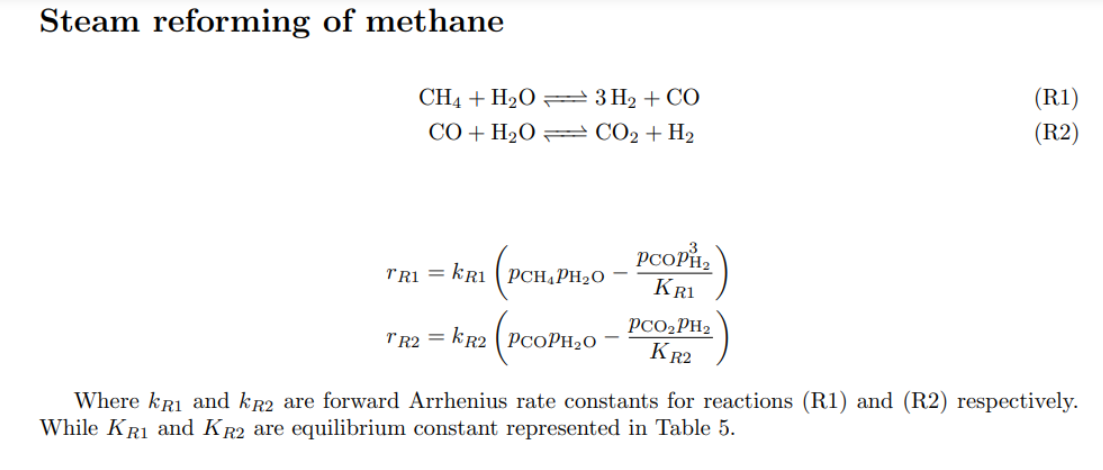


In [23]:
# deltaS Calculation
Entropies_973K = Molecular.mol_entropy(973,spec_in_file("therm.dat"));
Entropies_1073K = Molecular.mol_entropy(1073,spec_in_file("therm.dat"));
Entropies_1173K = Molecular.mol_entropy(1173,spec_in_file("therm.dat"))

# At 973K
delS973 = (3*Entropies_973K["H2"] + Entropies_973K["CO"] )  -  (Entropies_973K["H2O"] + Entropies_973K["CH4"] )

# At 1073K
delS1073 =(3*Entropies_1073K["H2"] + Entropies_1073K["CO"] )  -  (Entropies_1073K["H2O"] + Entropies_1073K["CH4"] )

# At 1173K
delS1173 = (3*Entropies_1173K["H2"] + Entropies_1173K["CO"] )  -  (Entropies_1173K["H2O"] + Entropies_1173K["CH4"] )

# deltaH Calculation
Enthalpies_973K = Molecular.mol_enthaply(973,spec_in_file("therm.dat"));
Enthalpies_1073K = Molecular.mol_enthaply(1073,spec_in_file("therm.dat"));
Enthalpies_1173K = Molecular.mol_enthaply(1173,spec_in_file("therm.dat"))

# At 973K
delH973 = (3*Enthalpies_973K["H2"] + Enthalpies_973K["CO"] )  -  (Enthalpies_973K["H2O"] + Enthalpies_973K["CH4"] )

# At 1073K
delH1073 =(3*Enthalpies_1073K["H2"] + Enthalpies_1073K["CO"] )  -  (Enthalpies_1073K["H2O"] + Enthalpies_1073K["CH4"] )

# At 1173K
delH1173 = (3*Enthalpies_1173K["H2"] + Enthalpies_1173K["CO"] )  -  (Enthalpies_1173K["H2O"] + Enthalpies_1173K["CH4"] )

# deltaG Calculation
delG973 = delH973 - 973*delS973
delG1073 = delH1073 - 1073*delS1073
delG1173 = delH1173 - 1173*delS1173

R = 8.314
Keq_973 = exp(-delG973/(R*973))
Keq_1073 = exp(-delG1073/(R*1073))
Keq_1173 = exp(-delG1173/(R*1173))

println(Keq_973)
println(Keq_1073)
println(Keq_1173)

1.4113768204172309e13
1.5541417633122805e13
1.6318376218788035e13
